# **Lesson 14 : Batch Normalization and Dropout**
#Outline
1. Load dataset and visualize
2. Add batchnorm layers
3. Comparison with and without batchnorm layers
4. Add dropout layer
5. Comparison with and without dropout layer

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.optim as optim
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **1. Load dataset and visualize**

In [ ]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True,
                                        transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 77205373.45it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 57573998.97it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 75184990.99it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20797520.49it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
batch_size = 4 # 1 lần học 4 ảnh (Cập nhật weight 1 lần dựa trên 4 ảnh)

In [ ]:
# Khi dùng batch bắt buộc phải sử dụng dataloader
# Dataloader(): giúp chia data thành từng batch và đưa từng batch vào cho model hình
# đảm bảo các batch ko bị lặp lại, tất cả các batch đều được học
# shuffle: trộn data và chọn ngẫu nhiên các sample của từng batch
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True)

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter) # next() giúp hiển thị khi từng batch khi học

print(images.shape)
print(images[0].shape)
print(labels[0].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
0


In [ ]:
def imshow(img, title):

    plt.figure(figsize=(batch_size * 4, 4))
    plt.axis('off')
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [ ]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))

    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

    return images, labels

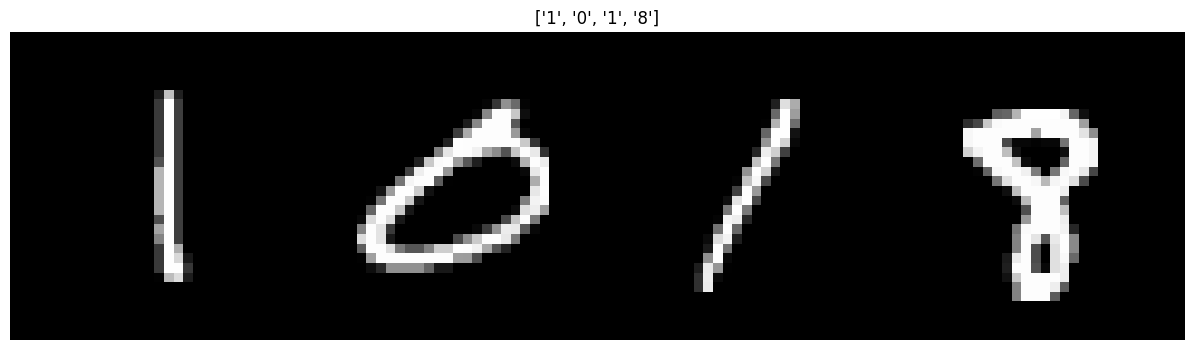

In [ ]:
images, labels = show_batch_images(trainloader)

### **2. Add batchnorm layers**

In [ ]:
from torch.nn.modules.linear import Linear
from torch.nn.modules.activation import ReLU
class Mynet(nn.Module):
  def __init__(self):
    super(Mynet, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784, 48), # 28 X 28 = 784, kích thước ảnh 28x28 được vector hóa
        nn.ReLU(),
        nn.Linear(48, 24),
        nn.ReLU(),
        nn.Linear(24, 10)
    )
  def forward(self, x): # Truyền 1 x bất kỳ vào, bắt đầu quá trình lan truyền thuận
    x = x.view(x.size(0), -1) # Biến x thành kích thước (784, 1) để làm input
    x = self.classifier(x)
    return x

In [ ]:
class MyNetBN(nn.Module): # MyNetBN model có Batch Normalization
  def __init__(self):
    super(MyNetBN, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(784, 48),
        nn.BatchNorm1d(48), # BatchNorm bắt buộc để trước bước kích hoạt
        nn.ReLU(),
        nn.Linear(48, 24),
        nn.BatchNorm1d(24),
        nn.ReLU(),
        nn.Linear(24, 10)
        )

  def forward(self, x):
      x = x.view(x.size(0), -1)
      x = self.classifier(x)
      return x

In [ ]:
model = Mynet()
print(model)

Mynet(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): ReLU()
    (2): Linear(in_features=48, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=10, bias=True)
  )
)


In [ ]:
model_bn = MyNetBN()
print(model_bn)

MyNetBN(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=48, bias=True)
    (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=48, out_features=24, bias=True)
    (4): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)


### **3. Comparison with and without batchnorm layers**

In [ ]:
batch_size = 512 # 2^n

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01) # Dùng SGD trong quá trình lan truyền ngược và cập nhật trọng số
opt_bn = optim.SGD(model_bn.parameters(), lr=0.01)

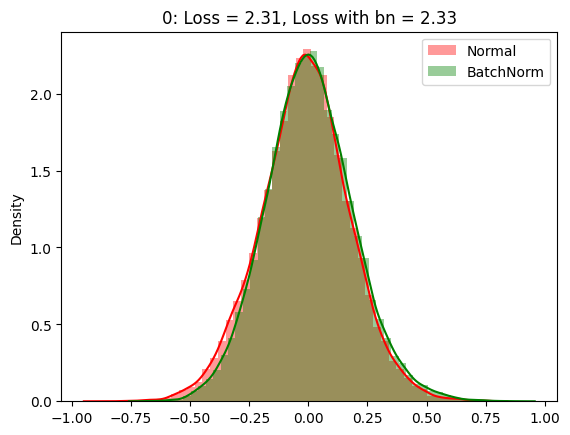

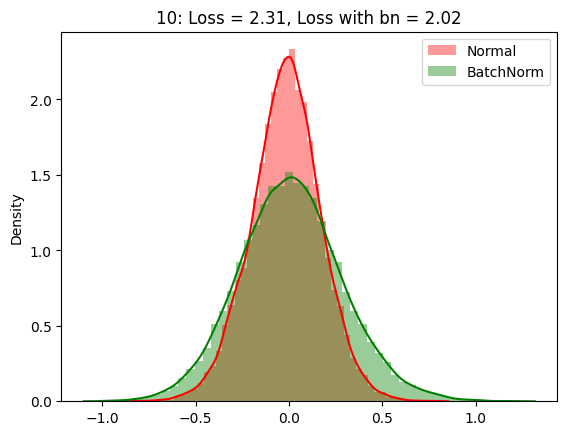

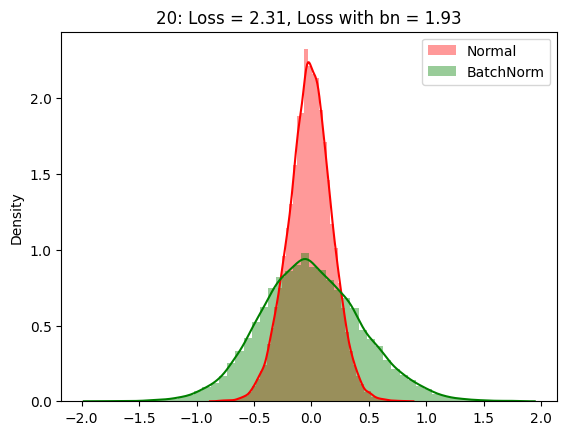

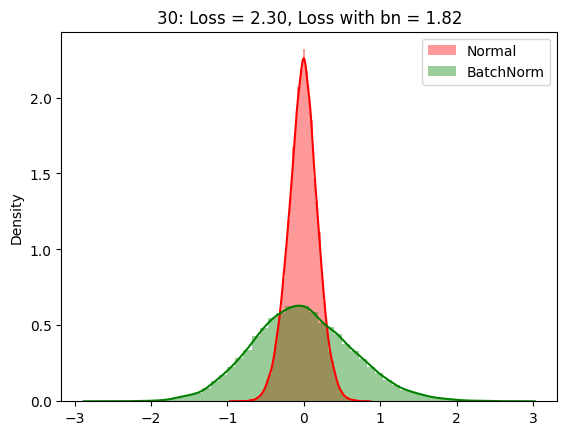

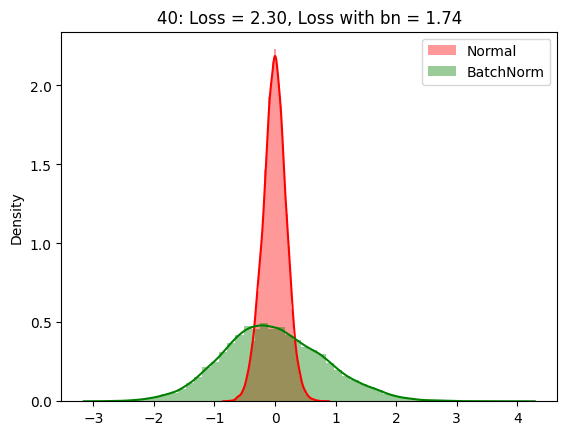

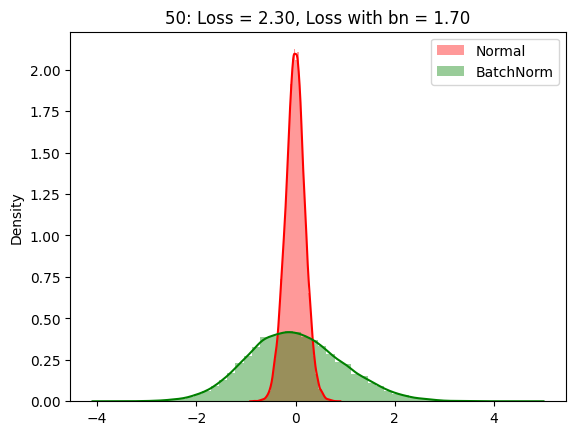

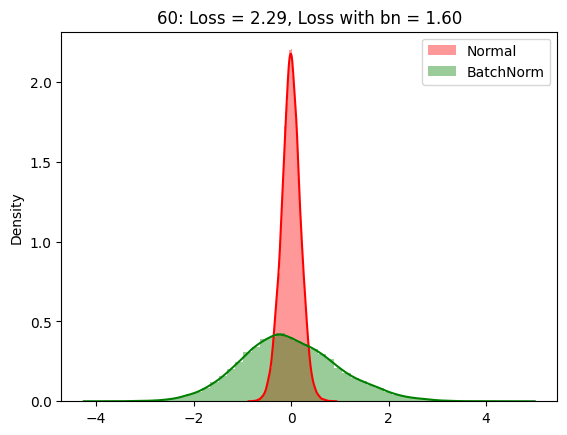

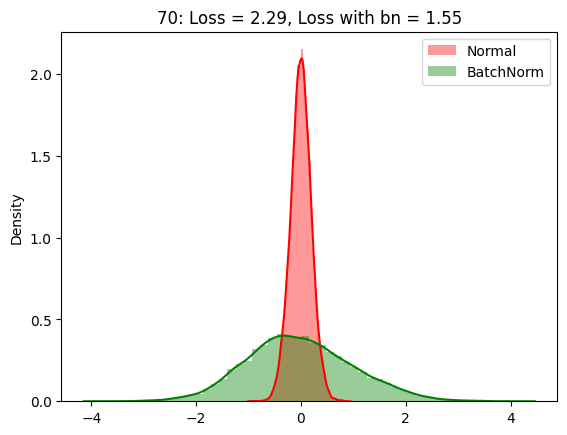

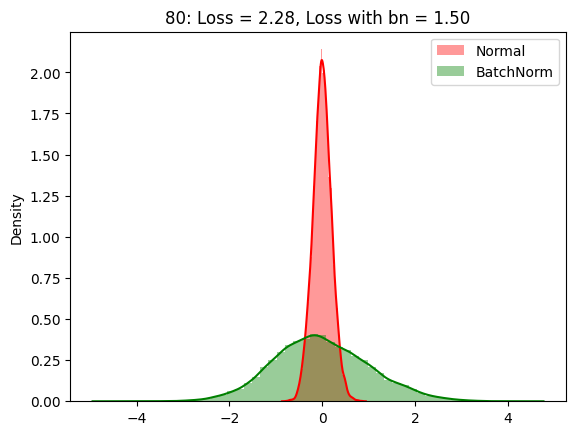

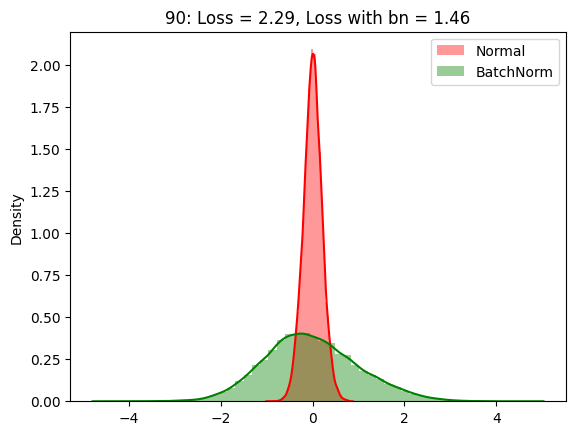

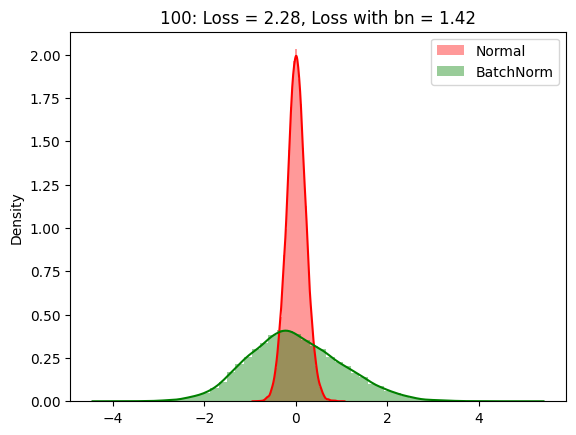

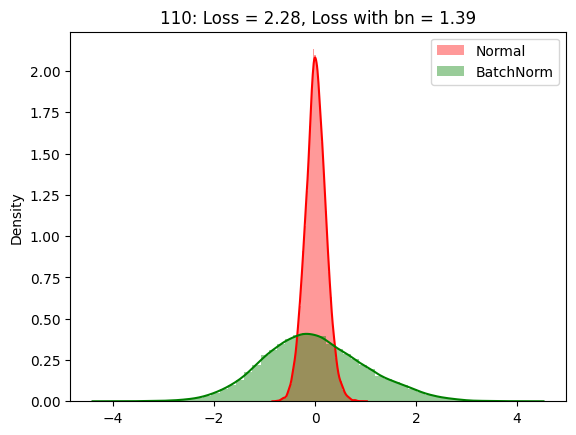

----------------------


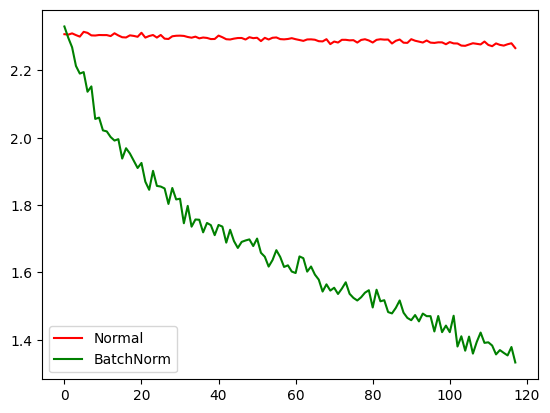

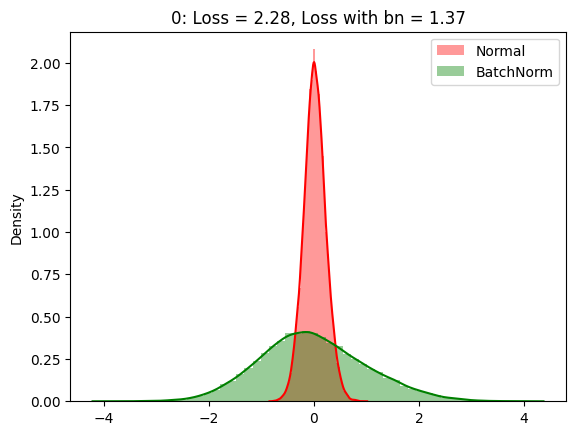

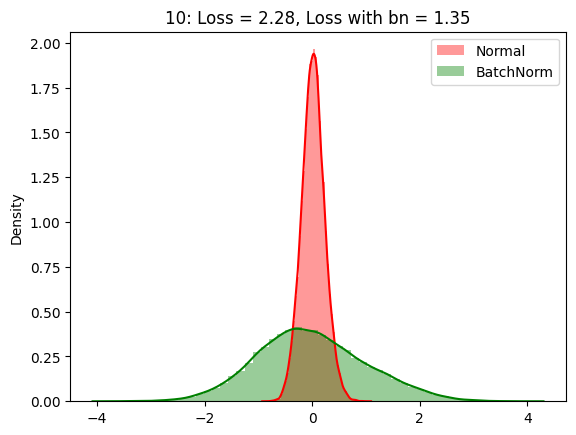

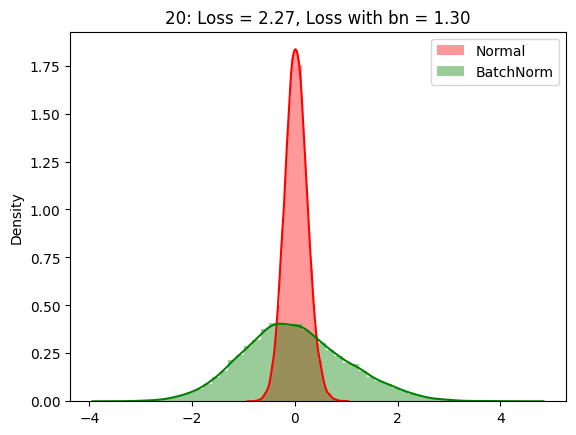

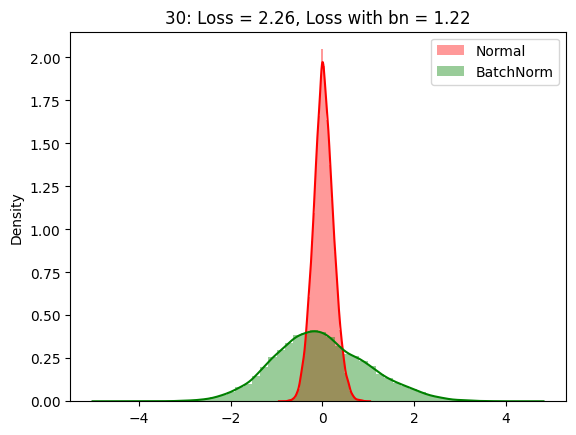

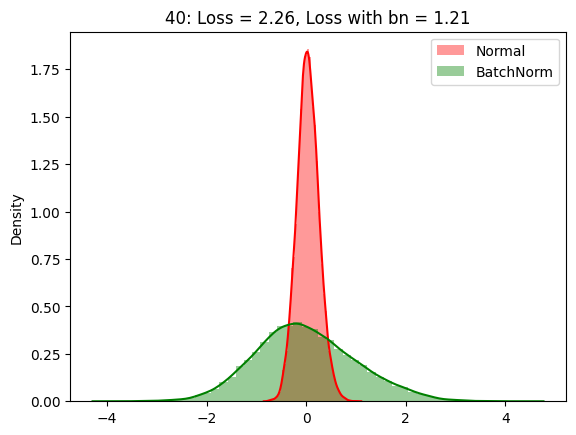

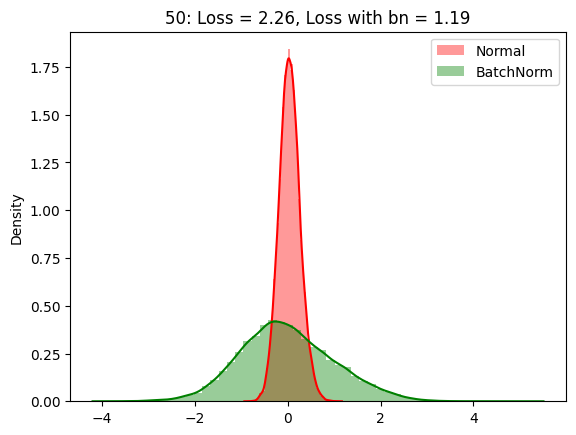

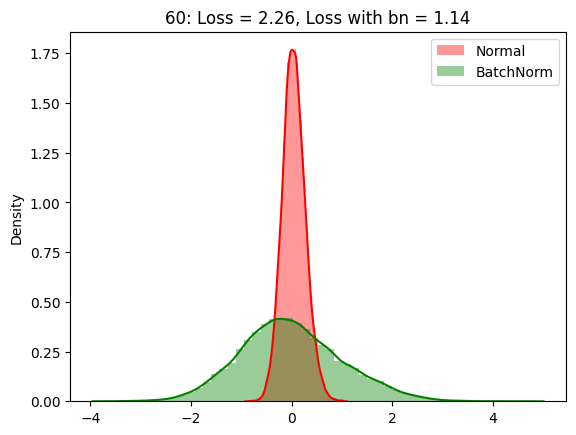

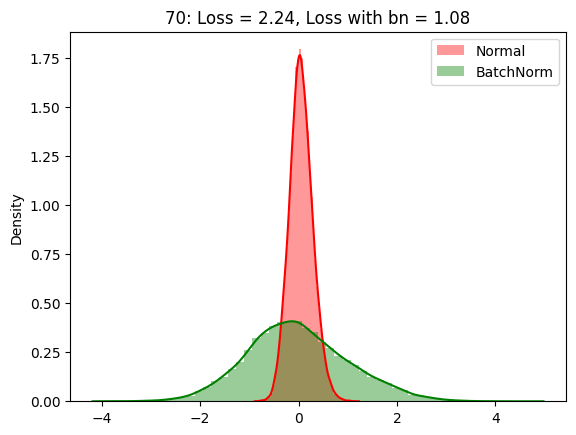

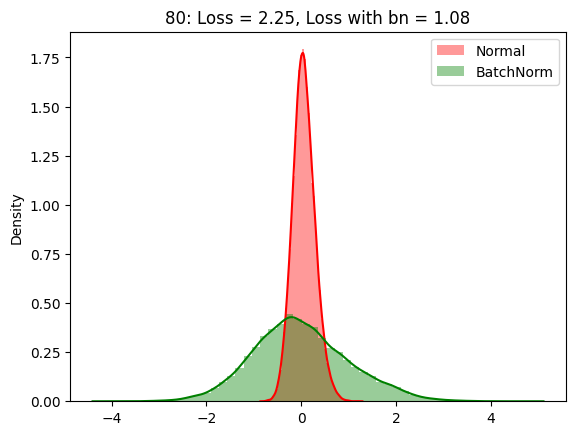

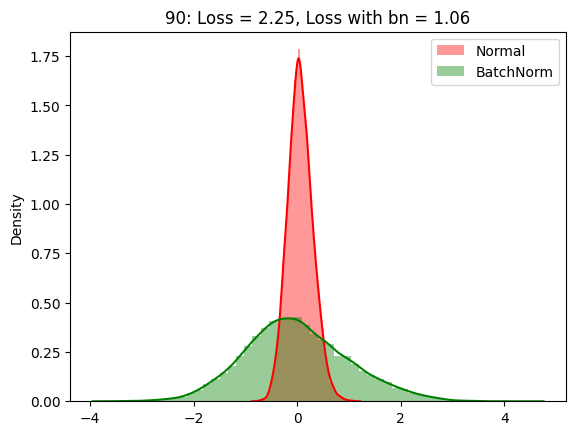

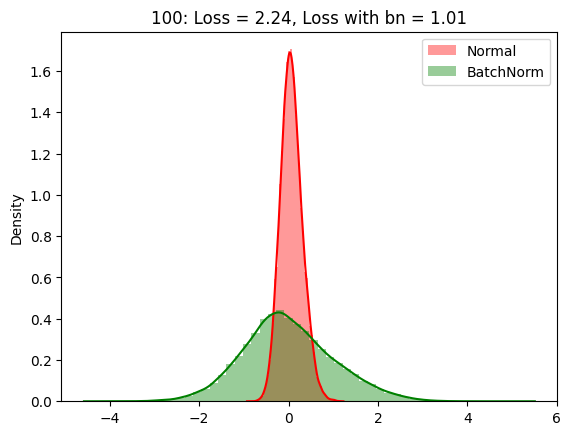

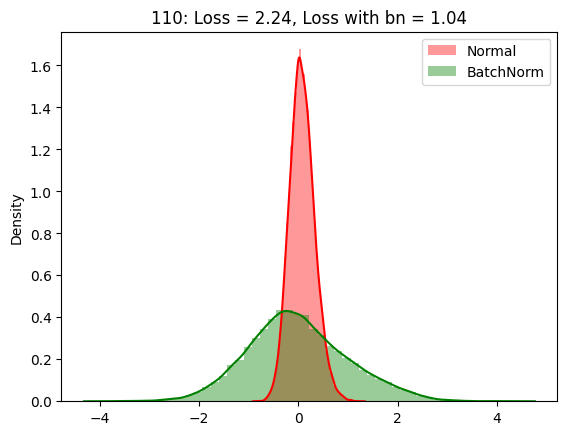

----------------------


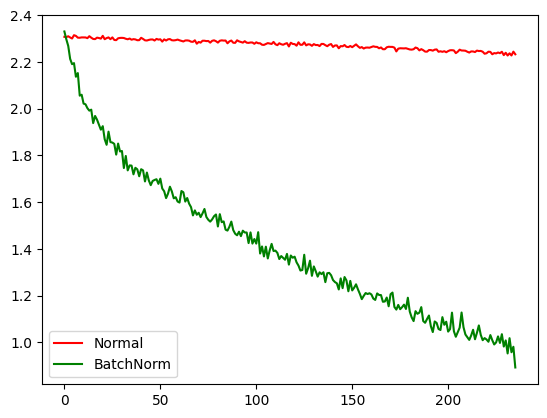

In [ ]:
loss_arr = []
loss_bn_arr = []

max_epochs = 2

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        # training steps for normal model
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        # training steps for bn model
        opt_bn.zero_grad()
        outputs_bn = model_bn(inputs)
        loss_bn = loss_fn(outputs_bn, labels)
        loss_bn.backward()
        opt_bn.step()

        loss_arr.append(loss.item())
        loss_bn_arr.append(loss_bn.item())

        if i % 10 == 0:

            inputs = inputs.view(inputs.size(0), -1)

            model.eval()
            model_bn.eval()

            a = model.classifier[0](inputs)
#             a = model.classifier[1](a)
#             a = model.classifier[2](a)
            a = a.detach().numpy().ravel()
            sns.distplot(a, kde=True, color='r', label='Normal')

            b = model_bn.classifier[0](inputs)
            b = model_bn.classifier[1](b)
#             b = model_bn.classifier[2](b)
#             b = model_bn.classifier[3](b)
#             b = model_bn.classifier[4](b)
            b = b.detach().numpy().ravel()

            sns.distplot(b, kde=True, color='g', label='BatchNorm')
            plt.title('%d: Loss = %0.2f, Loss with bn = %0.2f' % (i, loss.item(), loss_bn.item()))
            plt.legend()
            plt.show()
            plt.pause(0.5)

            model.train()
            model_bn.train()


    print('----------------------')

    plt.plot(loss_arr, 'r', label='Normal')
    plt.plot(loss_bn_arr, 'g', label='BatchNorm')
    plt.legend()
    plt.show()

>**Note:**
* Model có Batch Normalization luôn cho kết quả tốt hơn model không có Batch Normalization

### **4. Add dropout layer**

In [ ]:
N = 50
noise = 0.3

X_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_train = X_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1)) # add noise

X_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_test = X_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

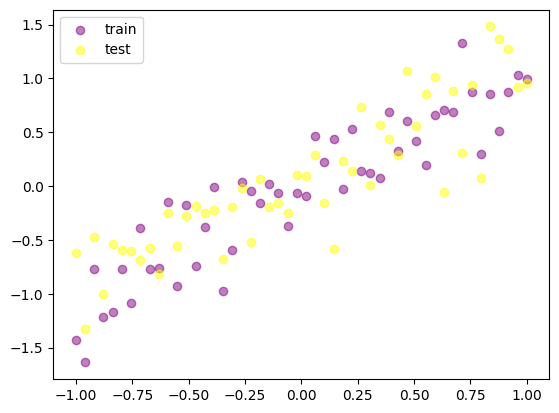

In [ ]:
plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
plt.legend()
plt.show()

In [ ]:
N_h = 100

model = torch.nn.Sequential(        # Model ko có dropout
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1)
)

model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0, 2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.2),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1)
)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.8141],
         [ 0.2559],
         [-0.4441],
         [-0.2474],
         [-0.3210],
         [ 0.6702],
         [ 0.7618],
         [ 0.1200],
         [ 0.9092],
         [-0.7961],
         [ 0.0420],
         [-0.0447],
         [-0.0519],
         [-0.2545],
         [-0.3336],
         [-0.0931],
         [ 0.9532],
         [ 0.8902],
         [ 0.7449],
         [ 0.8216],
         [ 0.6291],
         [-0.7291],
         [-0.9989],
         [ 0.4878],
         [ 0.9745],
         [ 0.8975],
         [ 0.3590],
         [-0.3294],
         [-0.7808],
         [-0.1523],
         [ 0.5842],
         [ 0.3074],
         [ 0.5272],
         [ 0.4345],
         [ 0.1149],
         [-0.1621],
         [-0.2241],
         [ 0.6534],
         [ 0.2092],
         [ 0.9143],
         [ 0.7269],
         [-0.5861],
         [ 0.1808],
         [ 0.8592],
         [-0.8660],
         [ 0.0650],
         [-0.2472],
         [ 0.6441],
         [ 0.7823

### **5. Comparison with and without dropout layer**

In [ ]:
opt = torch.optim.Adam(model.parameters(), lr=0.01)
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

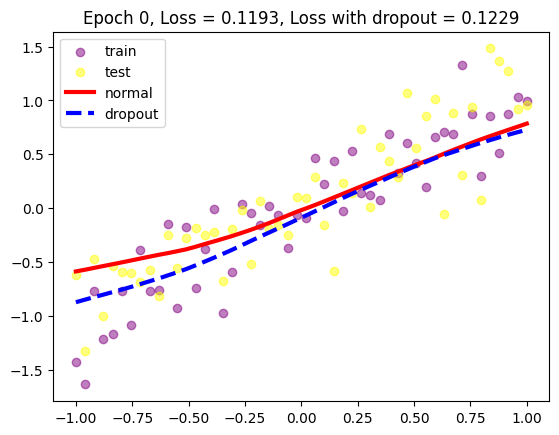

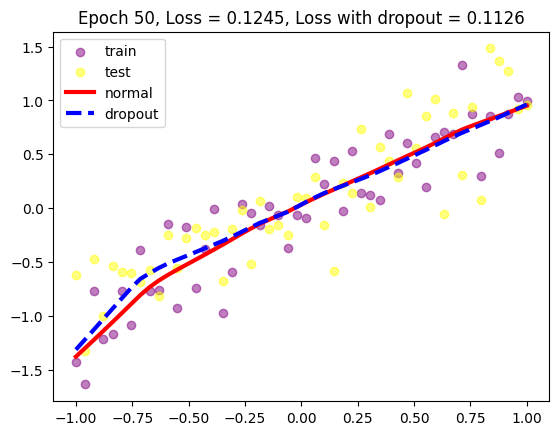

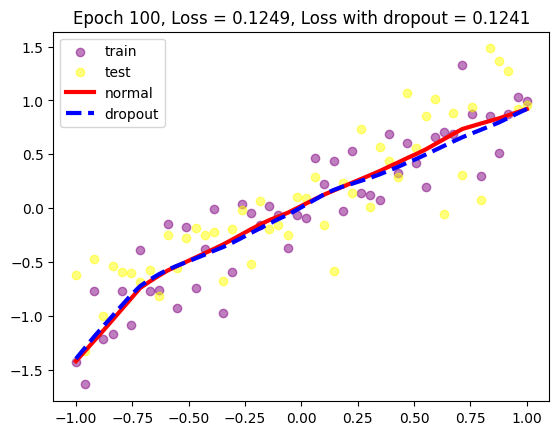

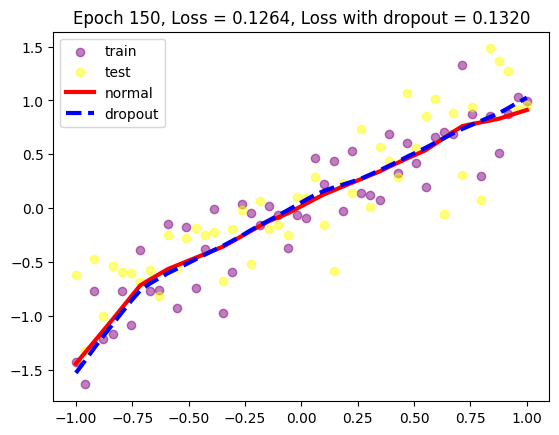

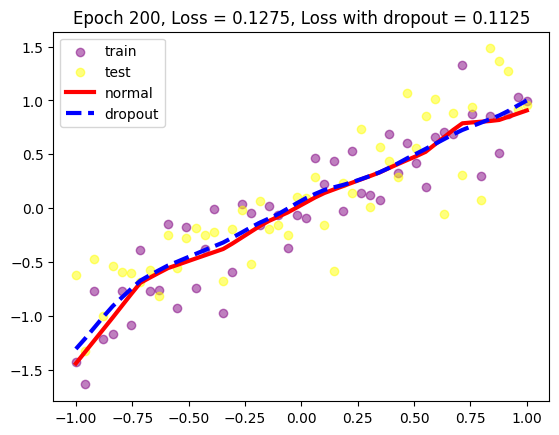

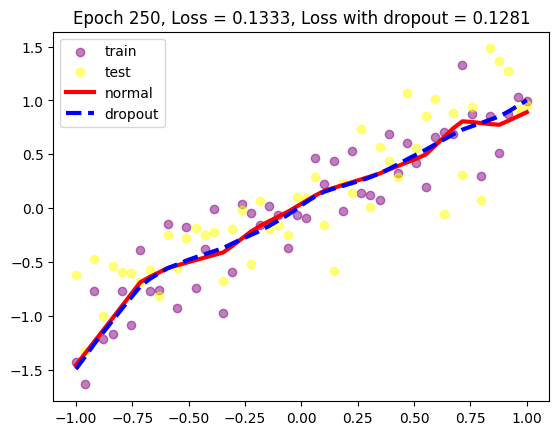

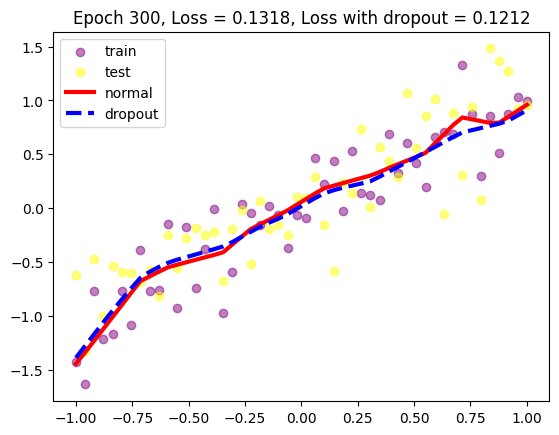

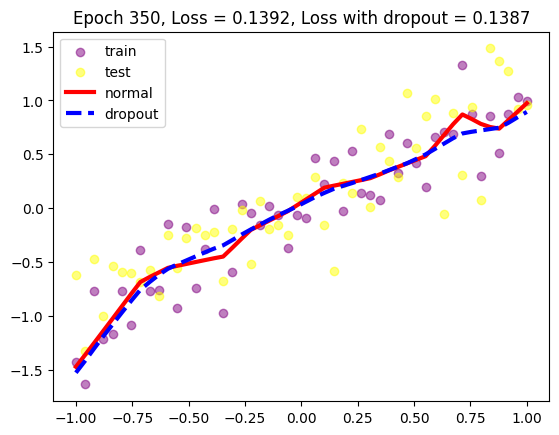

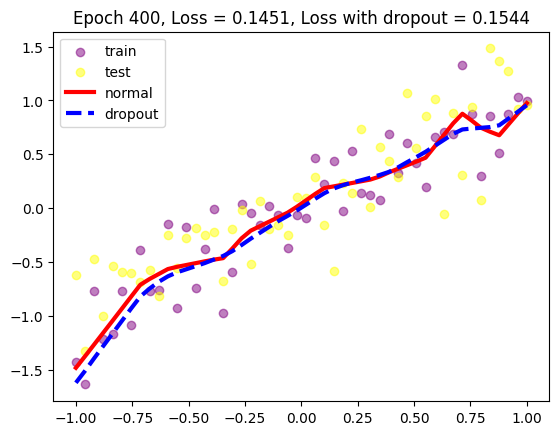

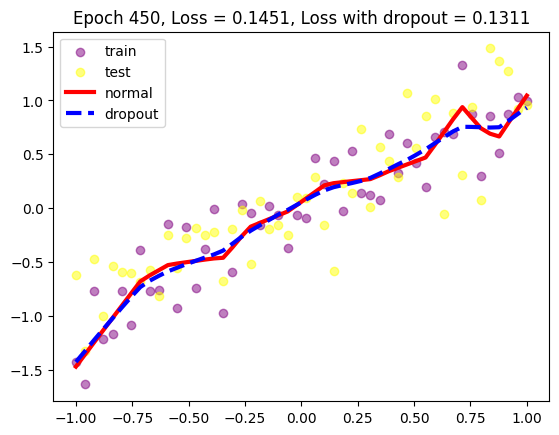

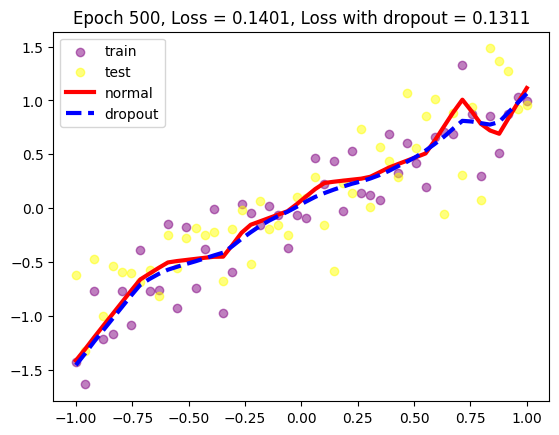

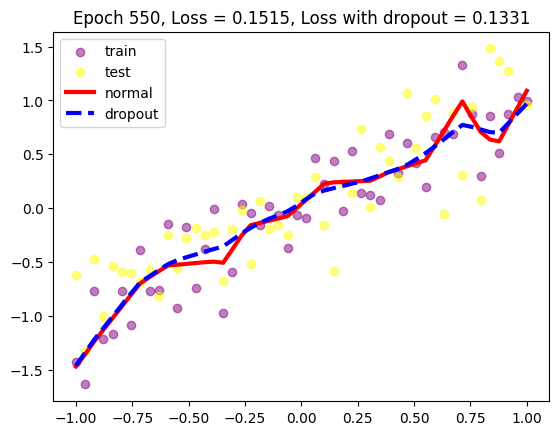

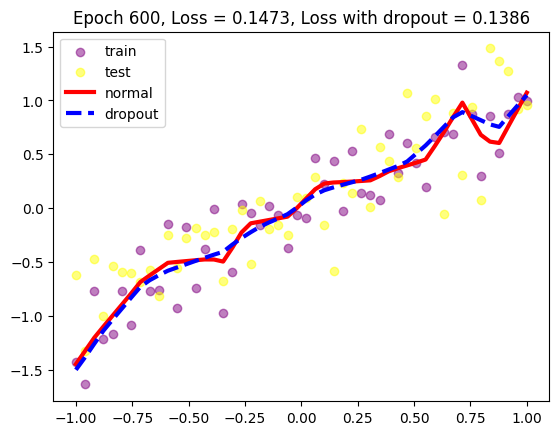

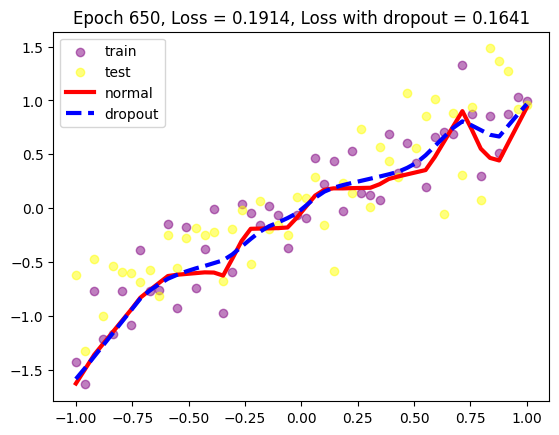

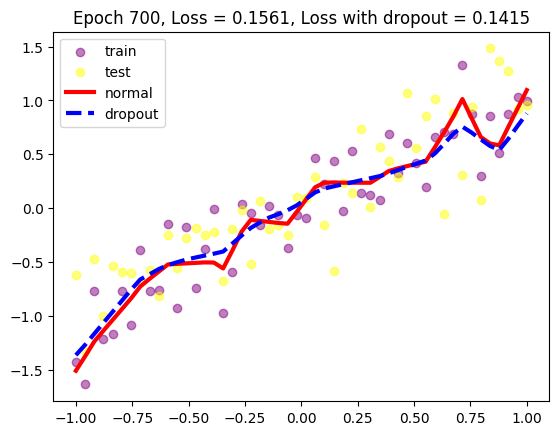

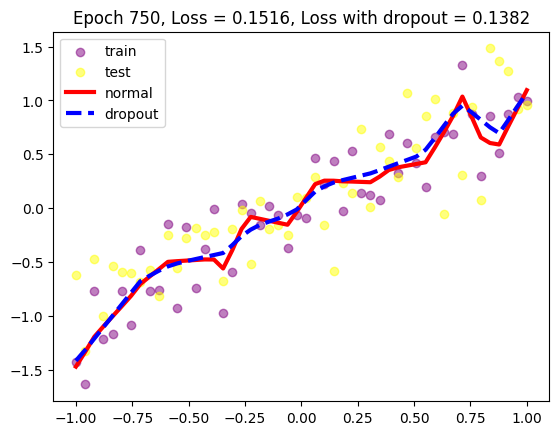

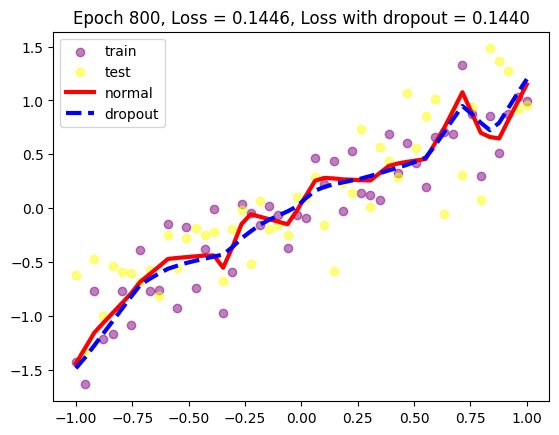

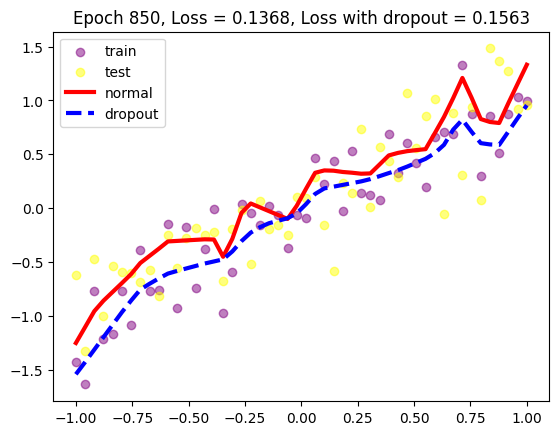

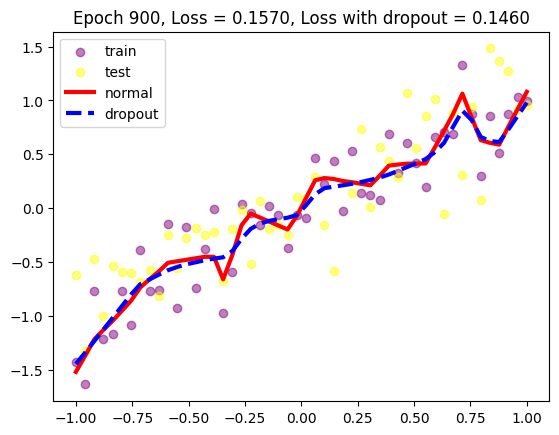

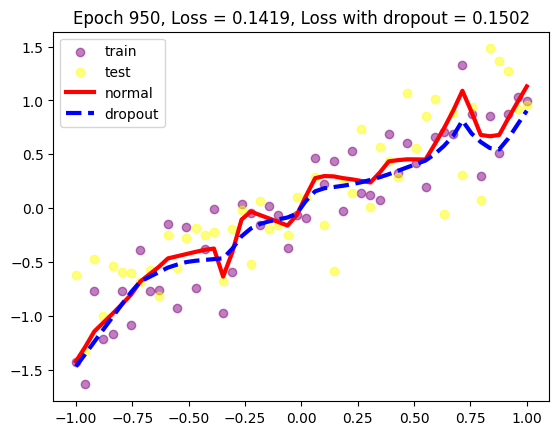

In [ ]:
max_epochs = 1000

for epoch in range(max_epochs):

    pred = model(X_train) # look at the entire data in a single shot
    loss = loss_fn(pred, Y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()

    pred_dropout = model_dropout(X_train)
    loss_dropout = loss_fn(pred_dropout, Y_train)
    opt_dropout.zero_grad()
    loss_dropout.backward()
    opt_dropout.step()


    if epoch % 50 == 0:

        model.eval()
        model_dropout.eval()

        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, Y_test)

        test_pred_dropout = model_dropout(X_test)
        test_loss_dropout = loss_fn(test_pred_dropout, Y_test)

        plt.scatter(X_train.data.numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
        plt.scatter(X_test.data.numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
        plt.plot(X_test.data.numpy(), test_pred.data.numpy(), 'r-', lw=3, label='normal')
        plt.plot(X_test.data.numpy(), test_pred_dropout.data.numpy(), 'b--', lw=3,  label='dropout')

        plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))

        plt.legend()

        model.train()
        model_dropout.train()

        plt.pause(0.05)

>**Notee:**
* Càng nhiều epoch trôi qua, model ko sử dụng dropout mất ổn định dần (đường màu đỏ gấp khúc nhiều và ko còn mượt được như các epoch đầu)
* Còn model có dropout tuy cũng có thay đổi nhưng vẫn mượt không như model ko có dropout.